# Feature Engineering Introduction

<div class="alert alert-info">

- Start with the raw data.
- Take everything you have. Cover all available information in the data with features
- Guess what the target depends on? (wear time depends on the number of trips)
- Look visually at classes/errors and make assumptions. Which ones are useful?
- Quite a few features can be harmful. Then you have to filter it out.

# 1. car_train dataset

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.float_format", "{:,.2f}".format)
pd.set_option("display.max_columns", None)
from classes import Paths
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
# https://seaborn.pydata.org/tutorial/color_palettes.html
# sns.set_theme(style="whitegrid", palette="pastel")
# sns.set_theme(style="whitegrid", palette="cubehelix")
# sns.set_theme(style="whitegrid", palette="YlOrBr")
# sns.set_theme(style="whitegrid", palette="Paired")
sns.set_theme(style="whitegrid", palette="Set2")

In [2]:
paths = Paths()
train = pd.read_csv(paths.car_train)
print(train.shape)
train.head(10)

(2337, 10)


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,35.20,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,30.34,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,30.45,engine_fuel
5,b12101843B,Skoda Rapid,economy,petrol,2.36,2013,42176,2018,50.93,engine_ignition
6,Q-9368117S,Nissan Qashqai,standart,petrol,5.32,2012,24611,2014,54.79,engine_overheat
7,O-2124190y,Tesla Model 3,premium,electro,3.90,2017,116872,2019,50.26,gear_stick
8,h16895544p,Kia Sportage,standart,petrol,3.50,2014,56384,2017,33.24,gear_stick
9,K77009462l,Smart ForFour,economy,petrol,4.56,2013,41309,2018,39.43,gear_stick


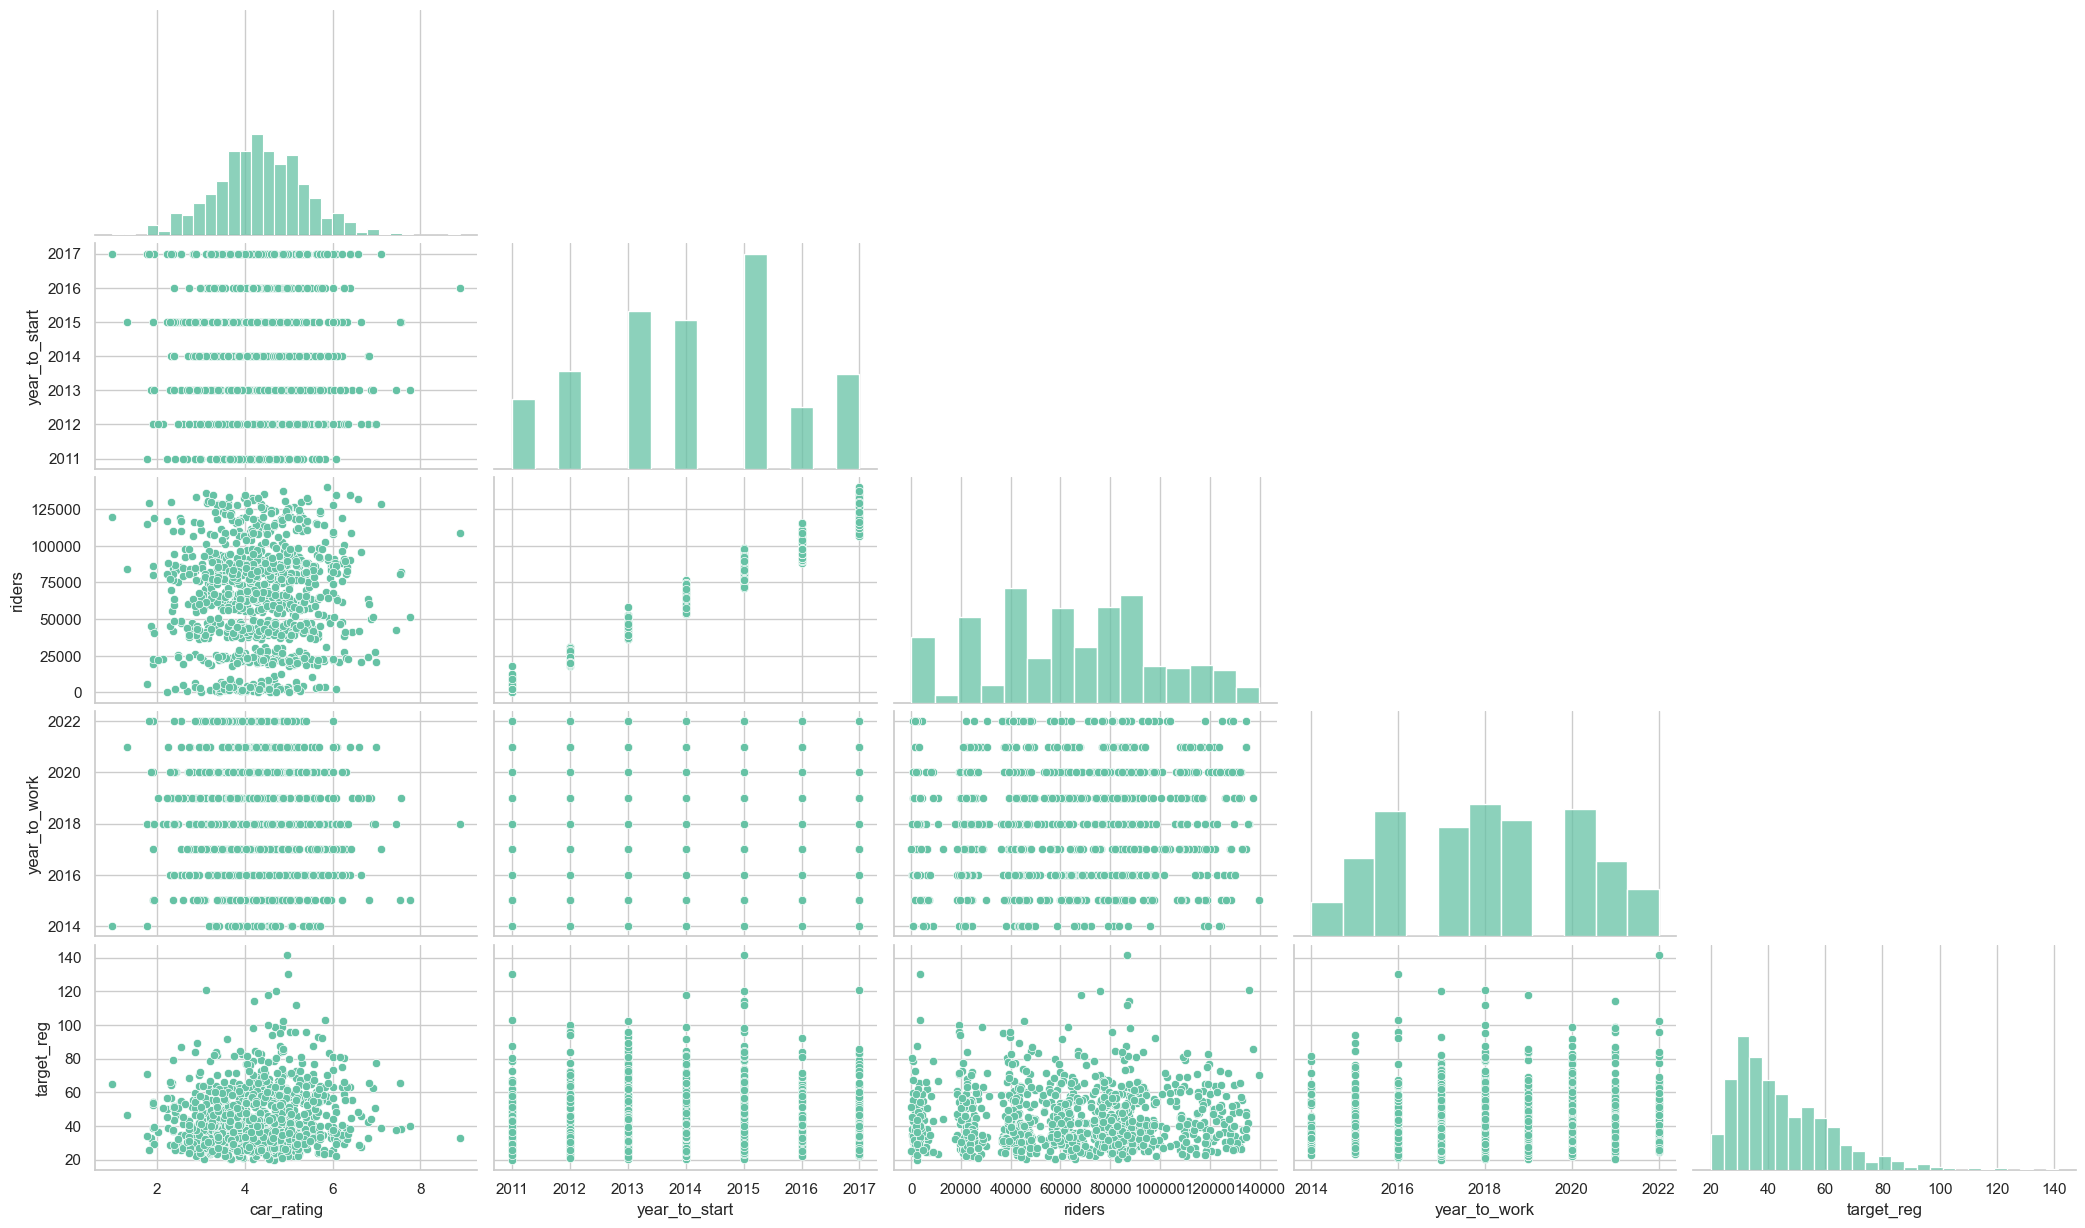

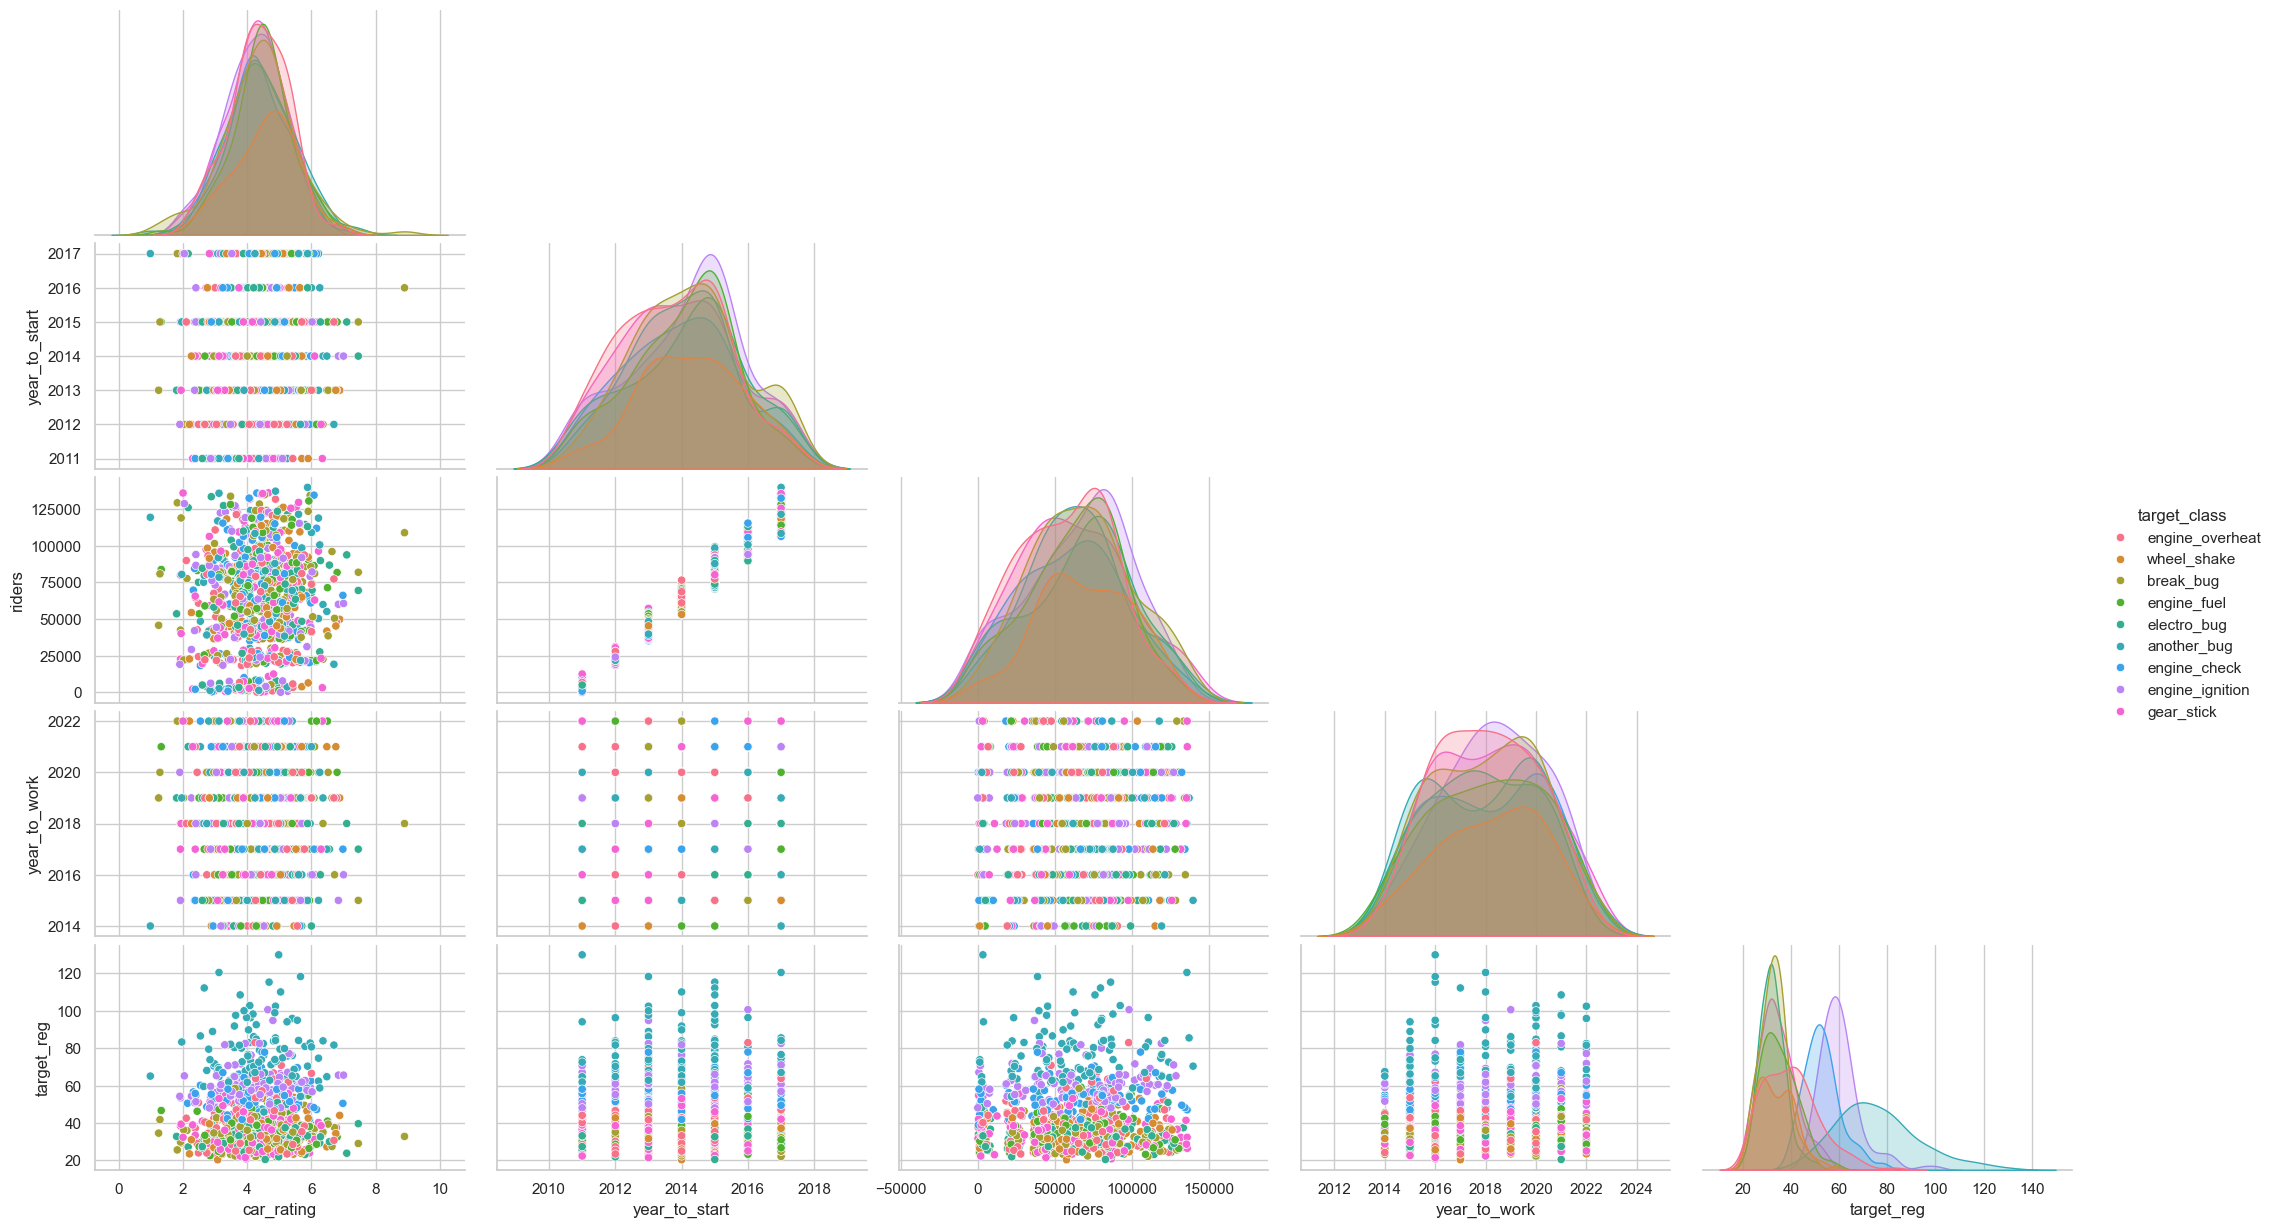

In [3]:
# train.hist(figsize=(25, 4), layout=(2, 5), bins=30);

sns.pairplot(
    train.sample(1000)
    , vars=train.select_dtypes(np.number).columns
    , corner=True
    , aspect=1.7
    # , hue="target_class"
);

sns.pairplot(
    train.sample(1000)
    , vars=train.select_dtypes(np.number).columns
    , corner=True
    , hue="target_class"
    , aspect=1.7
);

* `car_id` - ID of the car
* `model` / `car_type` / `fuel_type` - brand, class, and fuel type of the car
* `car_rating` / `riders` - the overall rating and the total number of rides by the end of the 2021 year.
* `year_to_start` / `year_to_work` - the year the car was built and started working in the fleet. 
* `target_reg` - the number of days before the breakdown.
* `target_class` - class of breakage (9 types in total)

## 2. rides_info dataset

In [4]:
rides_info = pd.read_csv(paths.rides_info)
print(rides_info.shape)
rides_info.head(10)

(739500, 14)


,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,o52317055h,A-1049127W,b1v,2020-01-01,4.95,21,268,36,113.55,0,514.25,0,1.12,2.91
1,H41298704y,A-1049127W,T1U,2020-01-01,6.91,8,59,36,93.00,1,197.52,0,1.65,4.13
2,v88009926E,A-1049127W,g1p,2020-01-02,6.01,20,315,61,81.96,0,"1,276.33",0,2.60,2.46
3,t14229455i,A-1049127W,S1c,2020-01-02,0.26,19,205,32,128.00,0,535.68,0,3.22,0.91
4,W17067612E,A-1049127W,X1b,2020-01-03,1.21,56,554,38,90.00,1,"1,729.14",0,2.72,-1.82
5,I45176130J,A-1049127W,j1v,2020-01-03,7.52,67,1068,28,36.00,2,363.21,0,0.50,-3.44
6,W11562554A,A-1049127W,A1g,2020-01-04,5.78,30,324,48,61.00,0,"1,314.26",0,1.46,-6.00
7,o13713369s,A-1049127W,B1n,2020-01-04,7.35,29,401,57,65.85,0,"1,753.89",0,0.50,-6.47
8,y62286141d,A-1049127W,h1a,2020-01-05,0.12,64,893,38,114.00,1,"2,022.13",0,-0.16,-5.12
9,V28486769l,A-1049127W,p1e,2020-01-05,3.32,43,424,31,51.30,1,"1,334.57",0,-3.76,-2.08


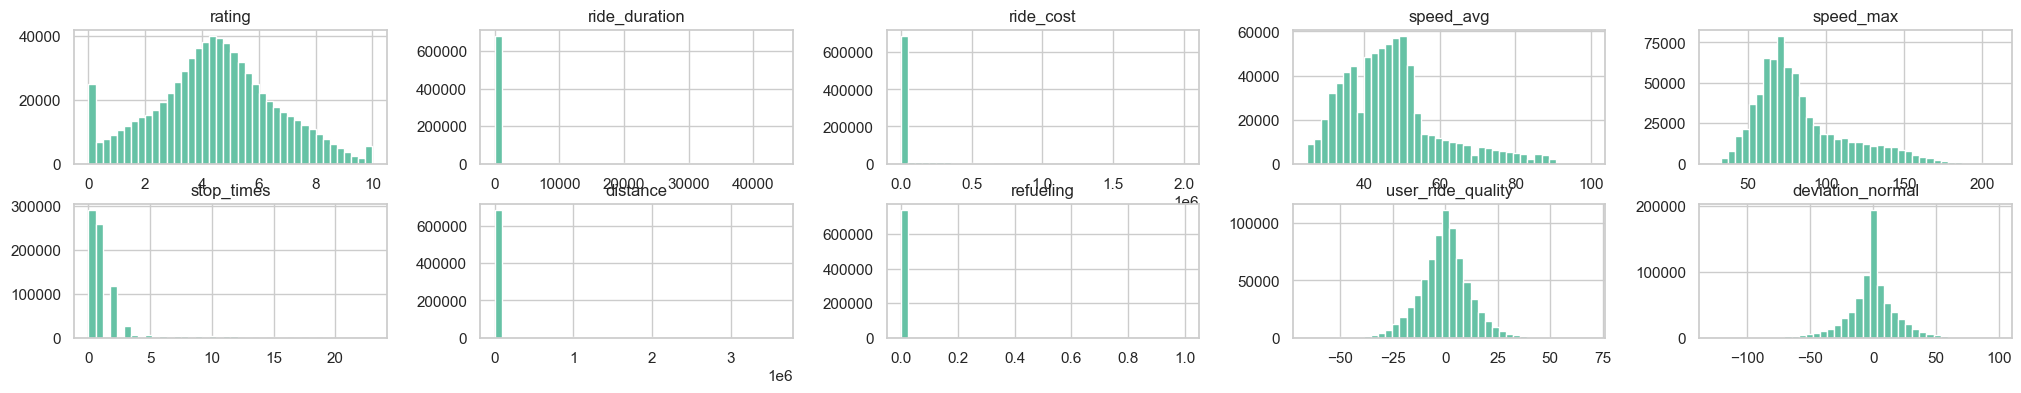

In [5]:
rides_info.hist(
    figsize = (25, 4)
    , layout = (2,-1)
    , bins=40
);

<div class="alert alert-info">

* `user_id` / `car_id` / `ride_id` - ids of the driver, car, and ride, respectively
* `ride_date` / `rating` - the date of the trip and the rating given by the driver 
* `ride_duration` / `distance` / `ride_cost` - duration (time), distance traveled, cost of the ride
* `speed_avg` / `speed_max` - average and maximum ride speeds, respectively
* `stop_times` / `refueling` - the number of stops (pauses) and the flag - whether there was refueling.
* `user_ride_quality` - assessment of the driving style in the driver's car, determined by the ML scoring system of the service.
* `deviation_normal` is a general indicator of the sensors about the condition of the machine, relative to the reference indicators (norms).

## 3. fix_info dataset

In [6]:
fix_info = pd.read_csv(paths.fix_info)
print(fix_info.shape)
fix_info.head(10)

(146000, 6)


,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.00,49
1,N-1530212S,LM,2020-2-9 20:25,repair,10.00,48
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.00,27
3,y13744087j,PG,2019-8-10 9:29,reparking,1.00,28
4,F12725233R,YC,2020-11-12 5:22,refuel_check,8.00,47
5,O41613818T,RW,2019-2-21 13:25,reparking,1.00,32
6,l-1139189J,PO,2020-3-2 19:11,reparking,1.00,28
7,d-2109686j,ML,2018-3-2 5:12,repair,7.40,39
8,u29695600e,QN,2020-2-2 20:10,reparking,10.00,64
9,U75286923j,KC,2019-9-2 6:32,reparking,1.00,24


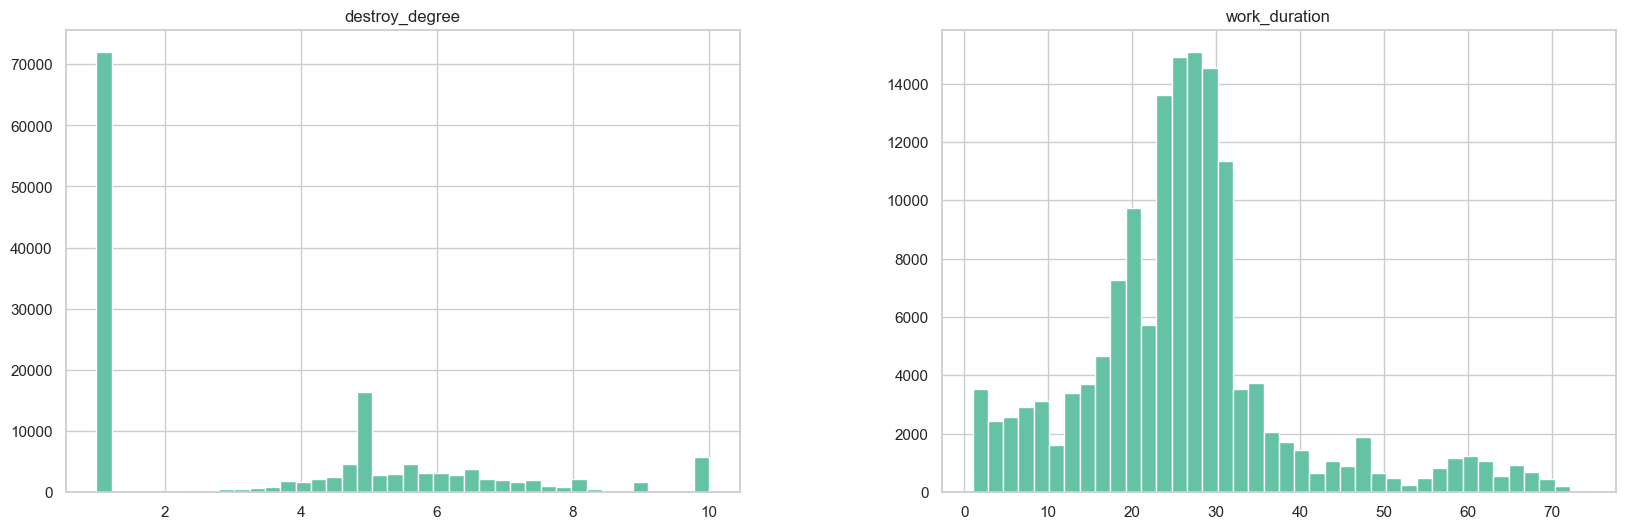

In [7]:
fix_info.hist(
    figsize=(20,6)
    , layout=(1,-1)
    , bins=40
);

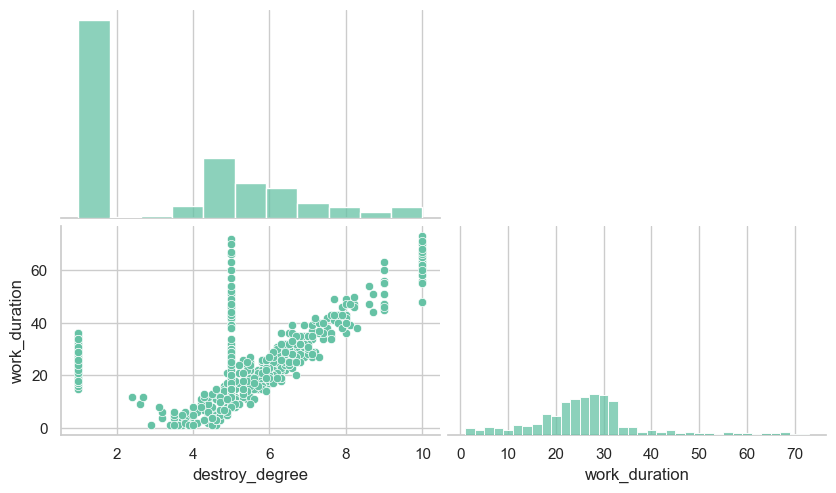

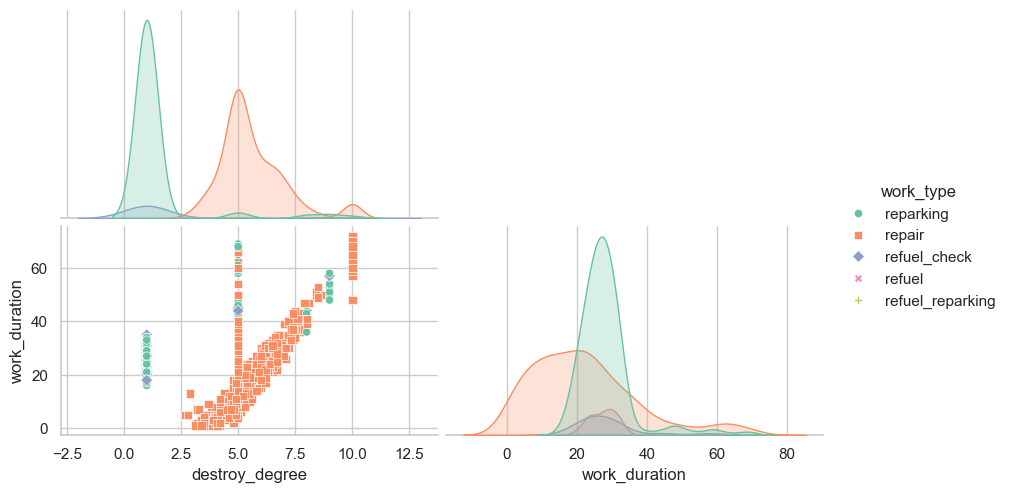

In [8]:
sns.pairplot(
    data=fix_info.sample(1000)
    , vars = fix_info.select_dtypes(np.number).columns
    # , hue="work_type"
    , corner=True
    , aspect=1.7
    , markers=["o", "s", "D", "X", "P"]
);
sns.pairplot(
    data=fix_info.sample(1000)
    , vars = fix_info.select_dtypes(np.number).columns
    , hue="work_type"
    , corner=True
    , aspect=1.7
    , markers=["o", "s", "D", "X", "P"]
);

<div class="alert alert-info">

* `worker_id` / `car_id` - the identifier of the employee and the machine, respectively 
* `work_type` / `work_duration` - type and duration (in hours) of the work performed
* `destroy_degree` - the degree of destruction/damage to the car in case of a breakdown
* `fix_date` - start time of the repair (time of removing the car from the line)